In [1]:
%%capture
import sys

# Añade el directorio principal al path de búsqueda para importar módulos desde esa ubicación
sys.path.insert(0, "..")

from likelihood.tools.impute import SimpleImputer
import pandas as pd
import requests
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 10
plt.style.use("seaborn-v0_8")

# URL of the raw file
url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes%20Missing%20Data.csv"

# Send a GET request to fetch the raw file
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open("Diabetes_Missing_Data.csv", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to retrieve the file.")

In [2]:
df = pd.read_csv("Diabetes_Missing_Data.csv")
df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


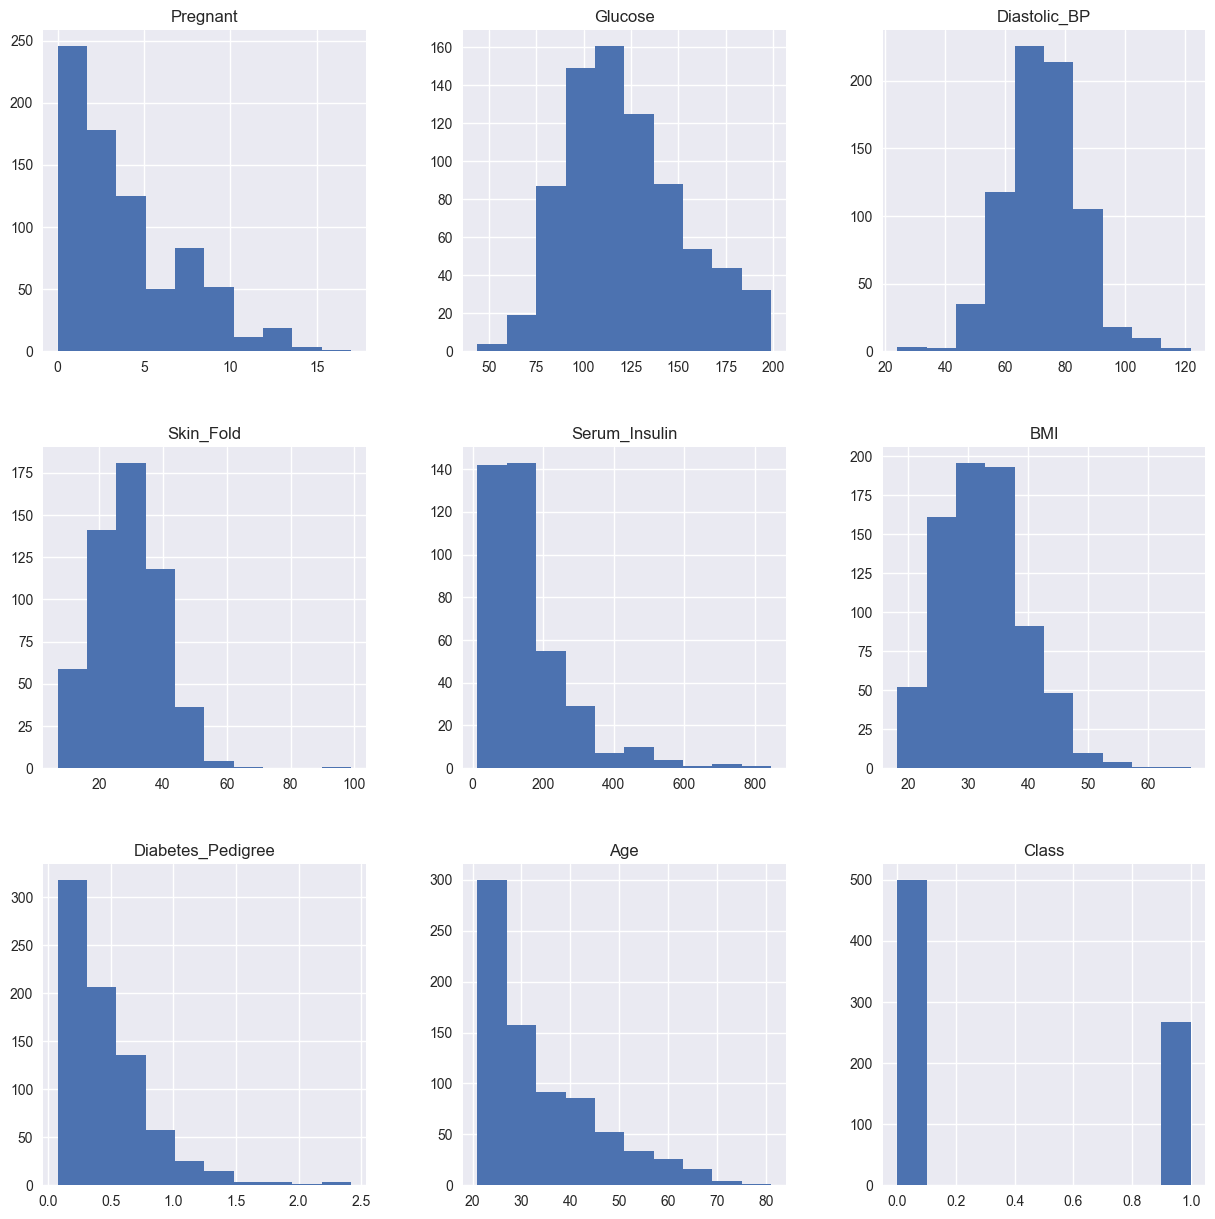

In [3]:
df.hist(figsize=(15, 15))
plt.show()

In [4]:
print("Number of rows with null values :", df.isnull().sum(), sep="\n")

imputer = SimpleImputer()
df_cleaned = imputer.fit_transform(df)
imputer.save("imputer.pkl")

# load the imputer
print("Loading the imputer")
imputer = SimpleImputer()
imputer = imputer.load("imputer.pkl")
print("Imputer loaded successfully")

df_cleaned = imputer.transform(df, inplace=False)

Number of rows with null values :
Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64
NaN values removed:  652
Infinite values removed:  0
Loading the imputer
Imputer loaded successfully


In [5]:
df_cleaned

,Pregnant,Glucose,Glucose_imputed,Diastolic_BP,Diastolic_BP_imputed,Skin_Fold,Skin_Fold_imputed,Serum_Insulin,Serum_Insulin_imputed,BMI,BMI_imputed,Diabetes_Pedigree,Age,Class
0,6,148.0,148.0,72.0,72.0,35.0,35.0,NaN,217.8,33.6,33.6,0.627,50,1
1,1,85.0,85.0,66.0,66.0,29.0,29.0,NaN,91.7,26.6,26.6,0.351,31,0
2,8,183.0,183.0,64.0,64.0,NaN,21.8,NaN,275.3,23.3,23.3,0.672,32,1
3,1,89.0,89.0,66.0,66.0,23.0,23.0,94.0,94.0,28.1,28.1,0.167,21,0
4,0,137.0,137.0,40.0,40.0,35.0,35.0,168.0,168.0,43.1,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,101.0,76.0,76.0,48.0,48.0,180.0,180.0,32.9,32.9,0.171,63,0
764,2,122.0,122.0,70.0,70.0,27.0,27.0,NaN,155.8,36.8,36.8,0.340,27,0
765,5,121.0,121.0,72.0,72.0,23.0,23.0,112.0,112.0,26.2,26.2,0.245,30,0
766,1,126.0,126.0,60.0,60.0,NaN,27.8,NaN,197.6,30.1,30.1,0.349,47,1


In [6]:
print("Number of rows with null values :", df_cleaned.isnull().sum(), sep="\n")
print("Length of the dataset after imputation :", "{:,}".format(len(df_cleaned)), sep="\n")

Number of rows with null values :
Pregnant                   0
Glucose                    5
Glucose_imputed            0
Diastolic_BP              35
Diastolic_BP_imputed       0
Skin_Fold                227
Skin_Fold_imputed          0
Serum_Insulin            374
Serum_Insulin_imputed      0
BMI                       11
BMI_imputed                0
Diabetes_Pedigree          0
Age                        0
Class                      0
dtype: int64
Length of the dataset after imputation :
768


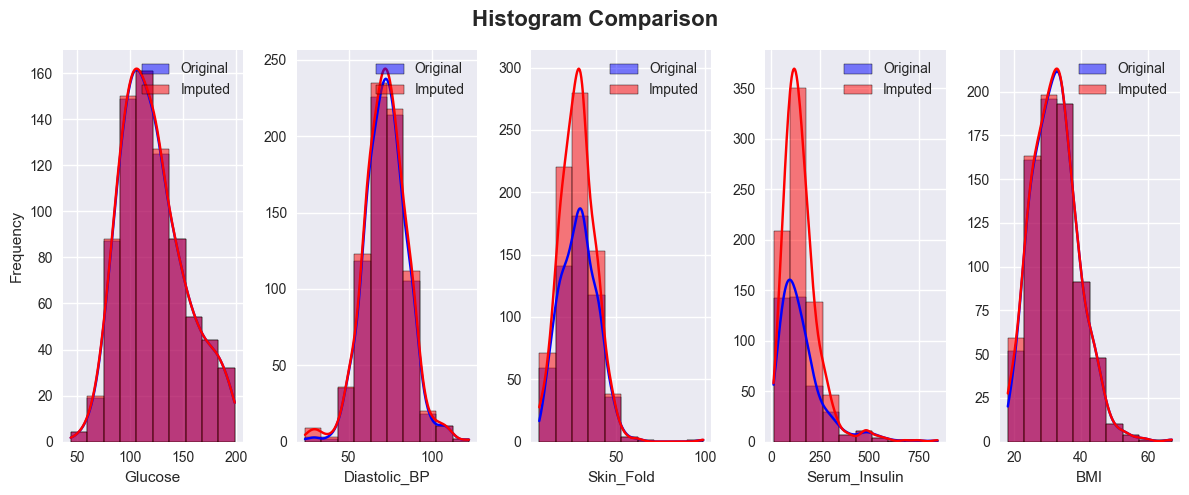

In [7]:
imputer.eval(df_cleaned)